In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Загружаем данные для анализа
df=pd.read_csv('data.csv', sep=';', decimal=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      15 non-null     int64  
 1   x2      15 non-null     int64  
 2   y1      15 non-null     float64
 3   y2      11 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 608.0 bytes


### Максимум, минимум, размах

In [4]:
# Максимум
print(max(df.x1))
print(np.max(df.x1))
print(df.x1.max())

20
20
20


In [5]:
# Минимум
print(min(df.x1))
print(np.min(df.x1))
print(df.x1.min())

1
1
1


In [6]:
# Размах (разница между минимальным и максимальным значением)
print(np.max(df.x1)-np.min(df.x1))

19


### Среднеарифметическое

In [7]:
print(sum(df.x1) / len(df.x1))
print(np.mean(df.x1))
print(df.x1.mean())

11.266666666666667
11.266666666666667
11.266666666666667


### Мода, медиана

In [8]:
print(df.x1.mode()[0])
print(df.x1.median())
print(np.median(df.x1))

5
13.0
13.0


### Дисперсия

In [9]:
# Ручной подсчет
def disp(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**2
    return diffs/(len(nums)-1)

print(disp(df.x1))

31.78095238095238


In [10]:
print(np.var(df.x1, ddof=1))
print(df.x1.var())

31.78095238095238
31.78095238095238


### Среднеквадратическое отклонение

In [11]:
# Ручной подсчет
def stdev(nums):
    diffs = 0 
    avg = sum(nums) / len(nums)
    for n in nums:      
        diffs += (n - avg) ** 2 
    return (diffs / (len(nums) - 1)) ** 0.5

print(stdev(df.x1))

5.637459745395295


In [12]:
print(df.x1.std(ddof=1))
print(np.std(df.x1, ddof=1))

5.637459745395295
5.637459745395295


### Квантили

In [13]:
# Квантиль 0,5 - медиана
print(df.x1.quantile())

13.0


In [14]:
# Первый и третий квантили
print(df.x1.quantile([0.25, 0.75]))

0.25     6.0
0.75    15.5
Name: x1, dtype: float64


In [15]:
# Межквартильный размах
q1 = df.x1.quantile(0.25)
q3 = df.x1.quantile(0.75)
iqr = q3 - q1
print(iqr)

9.5


### Комплексная статистика по датасету

In [16]:
print(df.describe())

              x1          x2         y1         y2
count  15.000000   15.000000  15.000000  11.000000
mean   11.266667   13.866667   2.793333   5.000000
std     5.637460   26.709727   1.683732   2.898275
min     1.000000    1.000000   0.100000   1.000000
25%     6.000000    2.500000   1.900000   3.000000
50%    13.000000    5.000000   2.500000   5.000000
75%    15.500000    8.500000   4.100000   6.500000
max    20.000000  100.000000   6.400000  10.000000


### Удаление выбросов

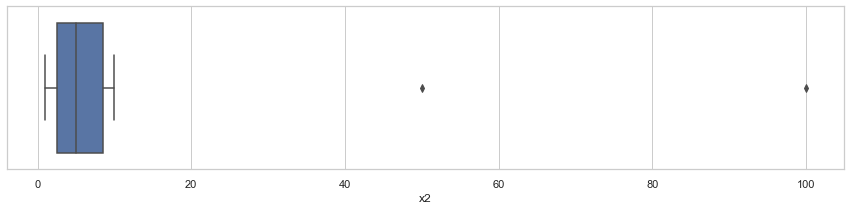

In [17]:
plt.figure(figsize=(15, 3))
sns.set_theme(style="whitegrid")
sns.boxplot(x='x2', data=df)
plt.show()

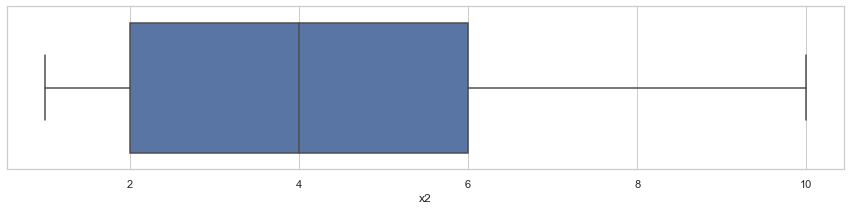

In [18]:
q1 = df.x2.quantile(0.25)
q3 = df.x2.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
df_new = df[df.x2.between(lower_bound, upper_bound, inclusive=True)]

plt.figure(figsize=(15, 3))
sns.set_theme(style="whitegrid")
sns.boxplot(x='x2', data=df_new)
plt.show()

### Пропуски

In [19]:
print(df.y2)

0      3.0
1     10.0
2      8.0
3      3.0
4      9.0
5      2.0
6      5.0
7      NaN
8      NaN
9      NaN
10     5.0
11     1.0
12     4.0
13     5.0
14     NaN
Name: y2, dtype: float64


In [20]:
print(f'В столбце y2 - {(df.y2.isnull().mean()):.1%} пропущенных значений')

В столбце y2 - 26.7% пропущенных значений


In [21]:
# Заменяем пропуски средним значением по столбцу
df.y2.fillna(df.y2.mean(), inplace=True)

In [22]:
# Считаем пропуски
print(df.y2.isna().sum())

0


In [23]:
df.head(20)

,x1,x2,y1,y2
0,13,3,2.6,3.0
1,9,10,2.7,10.0
2,14,8,4.2,8.0
3,1,3,0.1,3.0
4,5,9,2.0,9.0
5,5,2,2.5,2.0
6,16,5,4.8,5.0
7,20,1,4.0,5.0
8,11,1,2.2,5.0
9,16,6,6.4,5.0
